## Getting the Dataset

In [1]:
#dataset link: https://archive.ics.uci.edu/dataset/222/bank+marketing
data = 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'

In [3]:
#download the data and save it as telco_data.csv
!wget $data -O data/bank_marketing.zip 

--2024-10-13 11:42:36--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data/bank_marketing.zip’

data/bank_marketing     [           <=>      ] 999.85K   307KB/s    in 3.3s    

2024-10-13 11:42:41 (307 KB/s) - ‘data/bank_marketing.zip’ saved [1023843]



In [7]:
!unzip data/bank_marketing.zip -d data/

Archive:  data/bank_marketing.zip
 extracting: data/bank.zip           
 extracting: data/bank-additional.zip  


In [8]:
!unzip data/bank.zip -d data/

Archive:  data/bank.zip
  inflating: data/bank-full.csv      
  inflating: data/bank-names.txt     
  inflating: data/bank.csv           


##### Input variables:
**bank client data:**
1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")

**related with the last contact of the current campaign:**
1. contact: contact communication type (categorical: "unknown","telephone","cellular") 
2. day: last contact day of the month (numeric)
3. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
4. duration: last contact duration, in seconds (numeric)  
    **Important note:** this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the **duration is not known before a call** is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**
1. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
2. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
3. previous: number of contacts performed before this campaign and for this client (numeric)
4. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

##### Output variable (desired target)
y - has the client subscribed a term deposit? (binary: "yes","no")

## Importing Libraries

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Loading the dataset

In [12]:
df=pd.read_csv('./data/bank-full.csv',delimiter=';') 
print(df.shape)
df.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [21]:
needed_columns=['age','job','marital','education','balance','housing','contact','day','month','duration','campaign','pdays','previous','poutcome','y']
df_mod=df[needed_columns].copy()
df_mod

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [22]:
df_mod.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Questions and Answers

#### Question 1

What is the most frequent observation (mode) for the column education?

* unknown
* primary
* secondary
* tertiary

In [23]:
df_mod.education.mode()

0    secondary
Name: education, dtype: object

In [24]:
df_mod.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Answer: secondary

#### Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

* age and balance
* day and campaign
* day and pdays
* pdays and previous

In [25]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [28]:
numeric_col=['age','balance','duration','day','campaign','pdays','previous']
cor_mat=df_mod[numeric_col].corr()
cor_mat

,age,balance,duration,day,campaign,pdays,previous
age,1.000000,0.097783,-0.004648,-0.009120,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.021560,0.004503,-0.014578,0.003435,0.016674
duration,-0.004648,0.021560,1.000000,-0.030206,-0.084570,-0.001565,0.001203
day,-0.009120,0.004503,-0.030206,1.000000,0.162490,-0.093044,-0.051710
campaign,0.004760,-0.014578,-0.084570,0.162490,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.001565,-0.093044,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,0.001203,-0.051710,-0.032855,0.454820,1.000000


<Axes: >

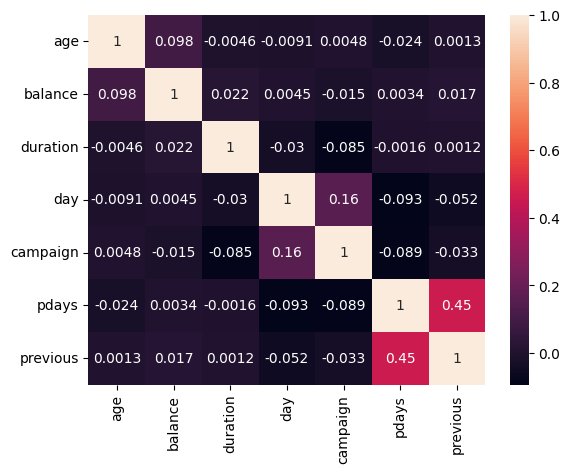

In [29]:
sns.heatmap(cor_mat, annot=True)

Answer: pdays and previous

#### Target encoding

In [103]:
df_mod.y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [104]:
df_mod.y=(df_mod.y=='yes').astype(int)
df_mod.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

#### Split the data

In [37]:
from sklearn.model_selection import train_test_split

In [105]:
# we want train_size=60%, validation_size=20%, test_size=20%
df_full_train, df_test = train_test_split(df_mod, test_size=0.2, random_state=42)        
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

#reseting the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

#separating the target value from features
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

#### Question 3

* Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using round(score, 2).

Which of these variables has the biggest mutual information score?

* contact
* education
* housing
* poutcome


In [55]:
df_train.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [106]:
from sklearn.metrics import mutual_info_score

def mutual_info_y_score(series):
    return mutual_info_score(series, y_train)

In [107]:
categorical=['job','marital','education','housing','contact','poutcome','month']

In [108]:
mi = df_train[categorical].apply(mutual_info_y_score)
mi.sort_values(ascending=False)

poutcome     0.029533
month        0.025090
contact      0.013356
housing      0.010343
job          0.007316
education    0.002697
marital      0.002050
dtype: float64

Answer: poutcome

#### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
  * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
  * model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.


What accuracy did you get?

* 0.6
* 0.7
* 0.8
* 0.9

In [51]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,technician,single,tertiary,no,1100,yes,yes,cellular,11,aug,67,1,-1,0,unknown
1,38,entrepreneur,married,secondary,no,0,yes,yes,cellular,17,nov,258,1,-1,0,unknown
2,49,blue-collar,married,secondary,no,3309,yes,no,cellular,15,may,349,2,-1,0,unknown
3,37,housemaid,married,primary,no,2410,no,no,cellular,4,aug,315,1,-1,0,unknown
4,31,self-employed,married,tertiary,no,3220,no,no,cellular,26,aug,74,4,-1,0,unknown


In [59]:
df_train.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [65]:
num_col=['age','balance','day','duration','campaign','pdays','previous']
cat_col=['job','marital','education','housing','contact','poutcome','month']

In [74]:
from sklearn.feature_extraction import DictVectorizer
dv=DictVectorizer(sparse=False)

In [85]:
#converting the data frame to a dictionary
train_dict=df_train[cat_col+num_col].to_dict(orient='records')
print(train_dict[:1])

#OHE the categorical values and prepare a numpy array
X_train=dv.fit_transform(train_dict)
print(list(X_train[0]))

[{'job': 'technician', 'marital': 'single', 'education': 'tertiary', 'housing': 'yes', 'contact': 'cellular', 'poutcome': 'unknown', 'month': 'aug', 'age': 32, 'balance': 1100, 'day': 11, 'duration': 67, 'campaign': 1, 'pdays': -1, 'previous': 0}]
[np.float64(32.0), np.float64(1100.0), np.float64(1.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(11.0), np.float64(67.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(-1.0), np.float64(0.0), np.float64(0.

In [86]:
#converting the data frame to a dictionary
val_dict=df_val[cat_col+num_col].to_dict(orient='records')
print(val_dict[:1])

#OHE the categorical values and prepare a numpy array
X_val=dv.transform(val_dict)
print(list(X_val[0]))

[{'job': 'services', 'marital': 'divorced', 'education': 'secondary', 'housing': 'yes', 'contact': 'unknown', 'poutcome': 'unknown', 'month': 'jun', 'age': 38, 'balance': -10, 'day': 17, 'duration': 61, 'campaign': 2, 'pdays': -1, 'previous': 0}]
[np.float64(38.0), np.float64(-10.0), np.float64(2.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(17.0), np.float64(61.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(-1.0), np.float64(0.0), np.float64(0.0)

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

#fitting the model
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [91]:
print(model.intercept_[0]) #getting the bias

-0.976486527757112


In [93]:
print(list(model.coef_[0])) #getting the weights

[np.float64(0.0008801734908313386), np.float64(1.0198427351296347e-05), np.float64(-0.07821187235413544), np.float64(0.25390919966547826), np.float64(0.0826469181172384), np.float64(-1.3130426455399917), np.float64(0.009227662993865056), np.float64(0.004156717299015937), np.float64(-0.44385803908470944), np.float64(-0.25063131796043414), np.float64(-0.0529088769384724), np.float64(-0.22908829377365728), np.float64(-0.1457718185327418), np.float64(-0.8307147092245833), np.float64(0.09772006980503724), np.float64(-0.24385006637800713), np.float64(-0.26376458728524266), np.float64(-0.3323855108298738), np.float64(-0.08015368641543777), np.float64(0.26547419919261966), np.float64(-0.2921811310930471), np.float64(-0.12937778630553481), np.float64(0.2884461927660432), np.float64(-0.14559408353783382), np.float64(0.03256664363658481), np.float64(-0.17338678131246196), np.float64(-0.35166872474798166), np.float64(-0.47575136354397424), np.float64(-0.14906643946535872), np.float64(-0.0127280616

In [96]:
y_pred=model.predict_proba(X_val)[:,1]
y_pred

array([0.01240549, 0.01017637, 0.15515956, ..., 0.05676404, 0.00908912,
       0.28499536])

In [99]:
decision=(y_pred>=0.5).astype(int)
decision

array([0, 0, 0, ..., 0, 0, 0])

In [109]:
(decision==y_val).mean()

np.float64(0.9009068790090687)

Answer: 0.9

#### Question 5

* Let's find the least useful feature using the ***feature elimination*** technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?
* age
* balance
* marital
* previous

**Note:** The difference doesn't have to be positive.

In [146]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

dv=DictVectorizer(sparse=False)

var_test=['marital','age','balance','previous']

#converting the data frame to a dictionary
train_dict=df_train[var_test].to_dict(orient='records')
val_dict=df_val[var_test].to_dict(orient='records')

#OHE the categorical values and prepare a numpy array
X_train=dv.fit_transform(train_dict)
X_val=dv.transform(val_dict)


model_test = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

#fitting the model
model_test.fit(X_train,y_train)

#getting prediction
y_pred=model_test.predict_proba(X_val)[:,1]

decision_test=(y_pred>=0.5).astype(int)

#getting accuracy
accuracy_test_base=(decision_test==y_val).mean()
accuracy_test_base

np.float64(0.880336208803362)

In [147]:
var_test=['marital','age','balance','previous']
result_dict=dict()
for col in var_test:
    print(f"Removing {col}")
    var_test_new=var_test.copy()
    var_test_new.remove(col)
    # print(var_test_new)

    dv=DictVectorizer(sparse=False)

    #converting the data frame to a dictionary
    train_dict=df_train[var_test_new].to_dict(orient='records')
    val_dict=df_val[var_test_new].to_dict(orient='records')

    #OHE the categorical values and prepare a numpy array
    X_train=dv.fit_transform(train_dict)
    X_val=dv.transform(val_dict)


    model_test = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

    #fitting the model
    model_test.fit(X_train,y_train)

    #getting prediction
    y_pred=model_test.predict_proba(X_val)[:,1]

    decision_test=(y_pred>=0.5).astype(int)

    #getting accuracy
    accuracy_test_var=(decision_test==y_val).mean()
    diff=accuracy_test_var-accuracy_test_base
    print(f"Difference by removing {col}= {diff}")
    
    result_dict[col]=diff

Removing marital
Difference by removing marital= -0.00011059500110588427
Removing age
Difference by removing age= 0.0001105950011059953
Removing balance
Difference by removing balance= 0.0
Removing previous
Difference by removing previous= 0.0013271400132713884


In [148]:
result_dict

{'marital': np.float64(-0.00011059500110588427),
 'age': np.float64(0.0001105950011059953),
 'balance': np.float64(0.0),
 'previous': np.float64(0.0013271400132713884)}

Answer: balance

#### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these C leads to the best accuracy on the validation set?
* 0.01
* 0.1
* 1
* 10
* 100

**Note:** If there are multiple options, select the smallest C.

In [172]:
num_col=['age','balance','day','duration','campaign','pdays','previous']
cat_col=['job','marital','education','housing','contact','poutcome','month']

dv=DictVectorizer(sparse=False)

#converting the data frame to a dictionary
train_dict=df_train[cat_col+num_col].to_dict(orient='records')
val_dict=df_val[cat_col+num_col].to_dict(orient='records')

#OHE the categorical values and prepare a numpy array
X_train=dv.fit_transform(train_dict)
X_val=dv.transform(val_dict)

C_list= [0.01, 0.1, 1, 10, 100]
accuracy_dict=dict()

for c_var in C_list:
    model = LogisticRegression(solver='liblinear', C=c_var, max_iter=1000, random_state=42)

    #fitting the model
    model.fit(X_train,y_train)
    y_pred=model.predict_proba(X_val)[:,1]
    decision=(y_pred>=0.5).astype(int)
    accuracy_var=(decision==y_val).mean()

    accuracy_dict[c_var]=round(accuracy_var,3)

In [173]:
accuracy_dict

{0.01: np.float64(0.898),
 0.1: np.float64(0.901),
 1: np.float64(0.901),
 10: np.float64(0.901),
 100: np.float64(0.901)}

In [175]:
accuracy_df=pd.DataFrame(data=accuracy_dict.values(),index=accuracy_dict.keys(),columns=['accuracy']).reset_index().rename(columns={'index':'c'})
accuracy_df.sort_values(by=['accuracy','c'],ascending=[False,True])

,c,accuracy
1,0.10,0.901
2,1.00,0.901
3,10.00,0.901
4,100.00,0.901
0,0.01,0.898


Answer: 0.1